<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Image%20Classification/CIFAR_10_(Improved_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 %tensorflow_version 2.x

In [ ]:
!ls 

sample_data


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input,Dense,Conv2D,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

170500096/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
k=len(np.unique(y_train))
k

10

In [ ]:
#build the model
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
 218/1563 [===>..........................] - ETA: 6:05 - loss: 2.0655 - accuracy: 0.3638

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.legend()

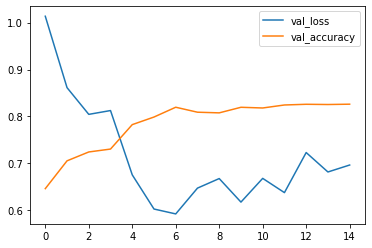

In [ ]:
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
#Data augmentation
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0]//batch_size
r=model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1562/1562 [==============================] - 463s 296ms/step - loss: 0.6186 - accuracy: 0.7985 - val_loss: 0.6596 - val_accuracy: 0.7956
Epoch 2/10
1562/1562 [==============================] - 462s 296ms/step - loss: 0.5051 - accuracy: 0.8318 - val_loss: 0.5187 - val_accuracy: 0.8302
Epoch 3/10
1562/1562 [==============================] - 463s 297ms/step - loss: 0.4770 - accuracy: 0.8374 - val_loss: 0.5041 - val_accuracy: 0.8368
Epoch 4/10
1562/1562 [==============================] - 460s 294ms/step - loss: 0.4435 - accuracy: 0.8484 - val_loss: 0.4964 - val_accuracy: 0.8392
Epoch 5/10
1562/1562 [==============================] - 463s 297ms/step - loss: 0.4234 - accuracy: 0.8562 - val_loss: 0.4629 - val_accuracy: 0.8434
Epoch 6/10
1562/1562 [==============================] - 461s 295ms/step - loss: 0.4020 - accuracy: 0.8615 - val_loss: 0.4374 - val_accuracy: 0.8562
Epoch 7/10
1562/1562 [==============

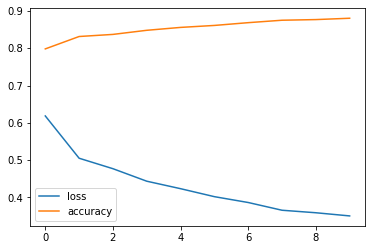

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.legend()

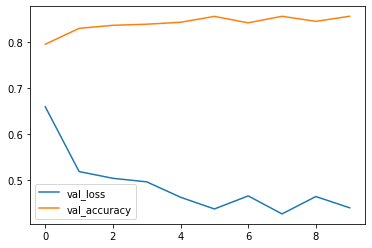

In [ ]:
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
y_pred=model.predict(x_test).argmax(axis=1)

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
y_test.shape

(10000,)

In [ ]:
labels=[      ]

In [ ]:
#missclassified examples
i=np.where(y_test!=y_pred)[0]
j=np.random.choice(i)
plt.imshow(x_test[j])
print("true label: %s, predicted label: %s" % (labels[y_test[j]],labels[y_pred]]))

In [ ]:
i

(array([  12,   24,   35, ..., 9989, 9993, 9996]),)